# <p style="text-align: center;">EE 379K: Data Science Lab</p>
# <p style="text-align: center;">Lab 2 - 9/18/17</p>
## <p style="text-align: center;">Rachel Chen and Kevin Yee</p>
### <p style="text-align: center;"> rjc2737 and kjy252</p>


## 1. Correlations

(a) When given a data matrix, an easy way to tell if any two columns are correlated is to
look at a scatter plot of each column against each other column. For a warm up, do this:
Look at the data in DF1 in Lab2.zip. Which columns are (pairwise) correlated? Figure
out how to do this with Pandas, and also how to do this with Seaborn.



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import seaborn as sns

In [2]:
colNames = pd.Series(['A','B','C'])
df = pd.read_csv("Lab2_Data/DF2")
df.columns = colNames;
df.head()

,A,B,C
0,0,1.038502,0.835053
1,1,0.320455,0.149079
2,2,0.055480,0.271672
3,3,-0.007260,-0.126550
4,4,-1.237390,-1.049932


C:\Users\kevjy\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


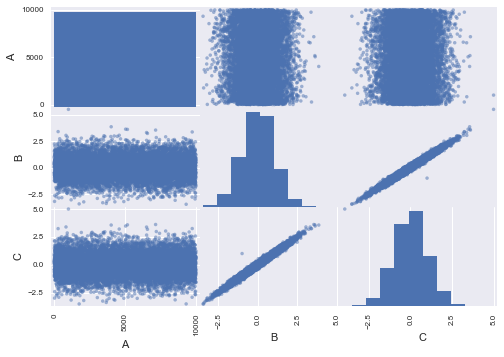

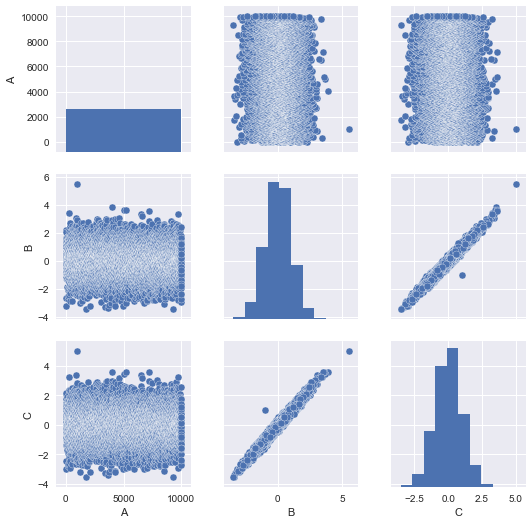

In [4]:
scatter_matrix(df);

sns.pairplot(df);
sns.plt.show();

(b) Compute the covariance matrix of the data. Write the explicit expression for what this
is, and then use any command you like (e.g., np.cov) to compute the 4  4 matrix.
Explain why the numbers that you get t with the plots you got.


In [5]:
df.cov()

,A,B,C
A,8.334167e+06,-13.270459,-14.014043
B,-1.327046e+01,1.004648,0.994242
C,-1.401404e+01,0.994242,1.004160


$$ -1 \leq p \leq 1 $$, where p is the correlation coefficient helps us determine if two variables are related to each other. 
The closer p is to -1 or 1, the stronger the correlation. 
As a result, we can see columns B and C are correlated to each other.

(c) The above problem in reverse. Generate a zero-mean multivariate Gaussian random
variable in 3 dimensions, $$Z = (X1;X2;X3)$$ so that $$(X1;X2)$$ and $$(X1;X3)$$ are uncorre-
lated, but $$(X2;X3)$$ are correlated. 

Specically: choose a covariance matrix that has the
above correlations structure, and write this down. Then nd a way to generate samples
from this Gaussian. 

Choose one of the non-zero covariance terms (Cij , if C denotes your covariance matrix) and plot it vs the estimated covariance term, as the number of
samples you use scales. 

The goal is to get a visual representation of how the empirical
covariance converges to the true (or family) covariance.

We can define the covariance matrix as follows:

$$\sum = 
\begin{bmatrix}
    \phi_1^2 & \phi_{12} &  \phi_{13}\\
    \phi_{21} & \phi_2^2 &  \phi_{23} \\
    \phi_{31} & \phi_{32} & \phi_{3}^2  
\end{bmatrix} $$

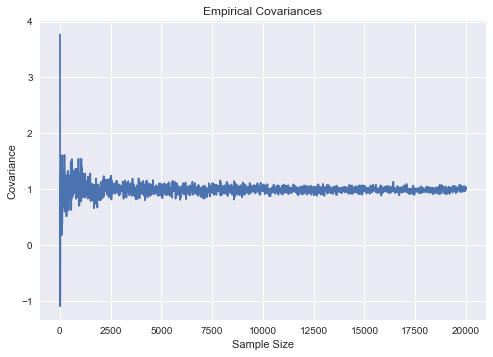

In [57]:
#Generate zero mean multivariate
#X2 and X3 are correlated
mean = [0, 0, 0]
cov = [[5, 0, 0],
        [0, 5, 0.99],
        [0, 0.99, 5]]

#Generate random samples from this gaussian
rv = np.random.multivariate_normal(mean,cov,100000)
df = pd.DataFrame(rv, columns = ['X1', 'X2', 'X3'])


samples = []
covariances = []
#Plot vs estimated covariance term, as the number of samples you use scale
for numsamples in range(0, 20000, 10):
    rv = np.random.multivariate_normal(mean,cov,numsamples)
    covar23 = pd.DataFrame(rv, columns = ['X1', 'X2', 'X3']).cov().loc['X2']['X3']
    
    samples.append(numsamples)
    covariances.append(covar23)



plt.title('Empirical Covariances')
plt.xlabel('Sample Size')
plt.ylabel('Covariance')
plt.plot(samples,covariances)
    

## 2. Outliers. 
Consider the two-dimensional data in DF2 in Lab2.zip. Look at a scatter plot
of the data. It contains two points that look like potential outliers. Which one is “more”
outlying? Propose a transformation of the data that makes it clear that the point at (−1, 1)
is more outlying than the point at (5.5, 5), even though the latter point is“farther away”
from the nearest points. Plot the data again after performing this transformation. Provide
discussion as appropriate to justify your choice of transformation. Hint: if y comes from a
standard Gaussian in two dimensions (i.e., with covariance equal to the two by two identity
matrix), and
$$Q = \begin{bmatrix}
    2       & \frac{1}{2} \\
    \frac{1}{2}       & 2
\end{bmatrix}$$
what is the covariance matrix of the random variable z = Qy? If you are given z, how would
you create a random Gaussian vector with covariance equal to the identity, using z?

## 3. Even More Standard Error
(This is to be completed only after you’ve completed the
last written exercise below). In one of the written exercises below, you derive an expression
1
for what is called the Standard Error: where β denotes the “truth,” βˆ denotes the value we
compute using least squares linear regression, and Z and e are as in the exercise below, you
find:
βˆ − β = Ze.
If we know the distribution of the noise (the distribution generating the noise vectors, ei),
then we know the distribution for the error, (βˆ − β). This allows us to answer the question
given in class: if we solve a regression and obtain value βˆ, how can we tell if it is statistically
significant? The answer is: we compare the size of βˆ to the spread introduced by the noise
(i.e., the standard error), and we ask: what is the likelihood that the true β = 0, and what
we observed was purely due to the noise.
If the noise is Gaussian (normal), i.e., ei ∼ N(0, σ2
), and if the values of the xi are normalized,
then we expect error of the size σ/√
n, as this is roughly the standard deviation of the
expression for the error that you derive above. This means: if you have twice the data points,
you should expect the error to be reduced by about 1.4 (the formula says that the standard
deviation of the error would decrease by a factor of 1/
√
2).
Compute this empirically, as follows: We will generate data for a regression problem, solve
it, and see what the error is: Generate data as I did in the example from class: xi ∼ N(0, 1),
ei ∼ N(0, 1). Generate y by yi = β0 + xiβ + ei
, where β0 = −3 and β = 0. Note that
since β = 0, this means that y and x are unrelated! The question we are exploring here is as
follows: when we solve a regression problem, we are not going to find βˆ = 0 – we will find
that βˆ takes some other values, hopefully close to zero. How do we know if the value of βˆ we
get is statistically meaningful?
• By creating fresh data and each time computing βˆ and recording βˆ − β, compute the
empirical standard deviation of the error for n = 150 (the number we used in class). In
class, in the exercise where I tried to find a linear regression of y vs. noise, we found
βˆ = −0.15. Given your empirical computation of the standard deviation of the error,
how significant is the value −0.15?
• Now repeat the above experiment for different values of n. Plot these values, and on the
same plot, plot 1/
√
n. How is the fit?